<a href="https://colab.research.google.com/github/sk-sharique/QuantumComputing/blob/master/QuantumProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Welcome to Quantum World!**

We are going to implement a quantum program using one of the famous, open source Quantum Computing framework **Qiskit** with an **IBM Q** quantum processor. 

In [0]:
pip install qiskit numpy matplotlib qiskit-ibmq-provider

In [0]:
import qiskit as q

In [0]:
circuit = q.QuantumCircuit(2,2) # 2 quantum bits, 2 classical bits

Apply X gate to a specified qubit. An X gate implements a pi rotation of the qubit state vector about the x axis of the Bloch sphere. This gate is canonically used to implement a bit flip on the qubit state from |0⟩ to |1⟩, or vice versa.

In [4]:
#initially we consider: (0,0)
circuit.x(0)

Apply CX gate from a specified control(control_qubit) to target(target_qubit) qubit. A CX gate implements a pi rotation of the qubit state vector about the x axis of the Bloch sphere when the control qubit in state |1⟩. This gate is canonically used to implement a bit flip on the qubit state from |0⟩ to |1⟩, or vice versa when the control qubit is |1⟩.

In [5]:
#(1,0)
circuit.cx(0,1) #flips target qubit iff control qubit is 1

At this point we have (1,1) as a final result


circuit.measure(quantum_bit/qubit, classical_bit/cbit)

Measure quantum bit into classical bit(tuples).

In [6]:
circuit.measure([0,1],[0,1]) 

In [7]:
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

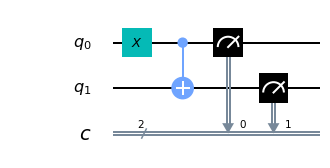

In [8]:
# Better representation of same circuit

circuit.draw(output="mpl")

We can run the program either on a quantum machine or on a simulator.
For that I tried using IBM Q processors which includes some machines and simulators to perform quantum logic. You can also use them.


1.   Go to https://quantum-computing.ibm.com
2.   Register yourself (I would recommend to register using google account).
3.   Click on profile picture.
4.   Go to My Account.
5.   On account page, below your name, click verify email. Verify it.
6.   On same page click on Copy token.
7.   Create a text file (token.txt) in same directory where you are running this program.
8.   Paste the token number in **token.txt** file and save it.





In [0]:
#Creating Connection with google drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [0]:
from qiskit import IBMQ

# Reading token.txt file from the appropriate directory
IBMQ.save_account(open("/gdrive/My Drive/Colab Notebooks/token.txt","r").read())

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [0]:
provider = IBMQ.get_provider("ibm-q")

In [13]:
for machine_or_simulator in provider.backends():
  try:
    qubit_count=len(machine_or_simulator.properties().qubits)
  except:
    qubit_count="simulated"
  
  print(f"{machine_or_simulator.name()} has {machine_or_simulator.status().pending_jobs} queued and {qubit_count} qubits")


ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_16_melbourne has 4 queued and 15 qubits
ibmq_vigo has 8 queued and 5 qubits
ibmq_ourense has 4 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 2 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits
ibmq_armonk has 1 queued and 1 qubits


As you can see we have received the details about IBM Q quantum processors and simulators. 

We can consider any of them to run our program. 

If we try to run it on a simulator we will get almost a perfect result.

I would like to run it on a machine to get a better idea about processing and output, the result will not be perfect because of quantum errors which arises due to presence of noise during processing.

In [14]:
from qiskit.tools.monitor import job_monitor 

we_are_using_a_quantum_computer = provider.get_backend("ibmq_london")

#Final command for processing on a quantum computer
job = q.execute(circuit, backend=we_are_using_a_quantum_computer , shots=500)

job_monitor(job)

Job Status: job has successfully run


In [0]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

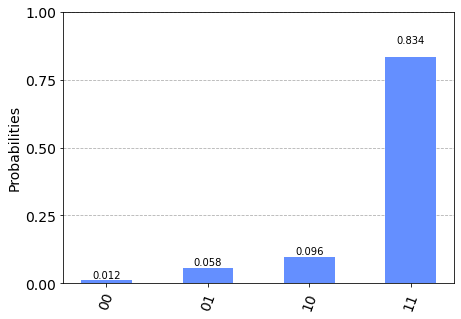

In [16]:
plot_histogram([counts])

***Our expected result was (1,1) but due to quantum noise we could not get a perfect result.***
